This notebook is to explore a sample root file data and to understand its data structure.

In [1]:
import uproot
import numpy as np
import matplotlib.pyplot as plt

In [8]:
file = uproot.open("/unix/erw/data/08-08-25/batch_output/run_0111.root")
print("ROOT file keys:", file.keys())

print("File contents:")
for key in file.keys():
    obj = file[key]
    print(f"- {key} - {type(obj)}")

ROOT file keys: ['Materials;1', 'Edep;1', 'Edep (noise);1']
File contents:
- Materials;1 - <class 'uproot.dynamic.Model_TTree_v5'>
- Edep;1 - <class 'uproot.dynamic.Model_TH1D_v1'>
- Edep (noise);1 - <class 'uproot.dynamic.Model_TH1D_v1'>


1440


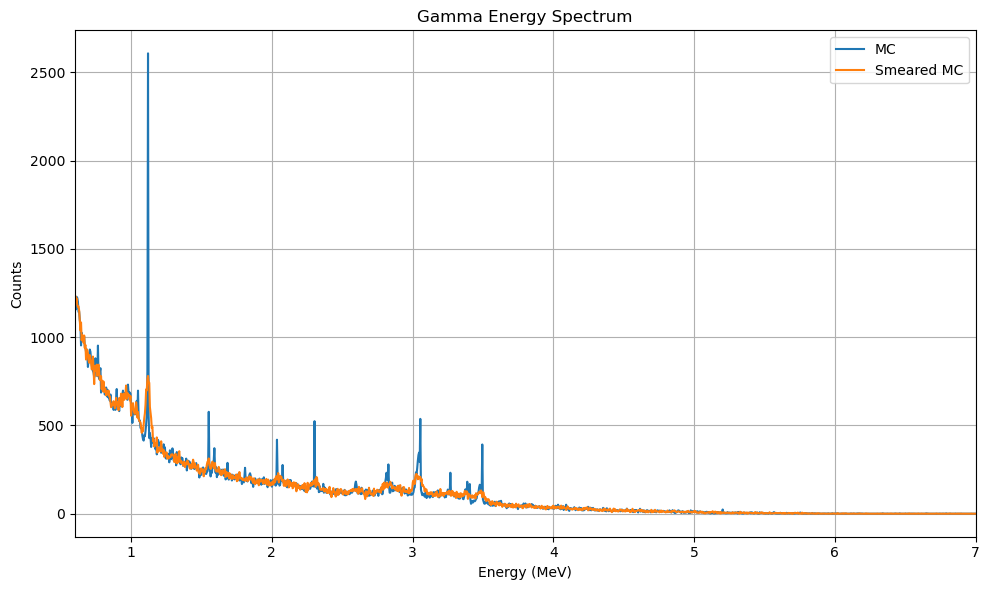

In [9]:
hist_clean = file["Edep"]
hist_noisy = file["Edep (noise)"]

counts_clean = hist_clean.values()
counts_noisy = hist_noisy.values()

n_bins = len(counts_clean)
print(n_bins)

bin_centres = np.linspace(0.6, 7.0, n_bins)

plt.figure(figsize=(10, 6))
plt.plot(bin_centres, counts_clean, label="MC")
plt.plot(bin_centres, counts_noisy, label="Smeared MC")
plt.xlabel("Energy (MeV)")
plt.xlim(0.6, 7.0)
plt.ylabel("Counts")
plt.title("Gamma Energy Spectrum")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [10]:
materials_tree = file["Materials"]

# convert to pandas
df = materials_tree.arrays(library="pd")
# remove deplicated data
df = df.drop_duplicates()
print(df.head(20))

   Material  Density (g/cm3)  Element  Fraction
0      SOIL              1.3        C  0.034400
1      SOIL              1.3       Si  0.451354
2      SOIL              1.3        O  0.514246


In [11]:
element_list = ['C', 'O', 'Si']
element_to_index = {el: i for i, el in enumerate(element_list)}
Y = []

df = file["Materials"].arrays(library="pd")
df = df.drop_duplicates()
target = np.zeros(len(element_list), dtype=np.float32)
for _, row in df.iterrows():
    idx = element_to_index[row["Element"]]
    target[idx] += row["Fraction"]
Y.append(target)

print(Y)

[array([0.0344    , 0.51424587, 0.45135412], dtype=float32)]
